In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import numpy.matlib

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import mean_squared_error
import scipy

# import ridge
from sklearn.linear_model import Ridge

# import SVR
from sklearn.svm import SVR

# import nu-SVR
from sklearn.svm import NuSVR

# plot figures inline
%matplotlib inline
 
# set figure size
plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [4]:
arr = np.loadtxt('data.csv', delimiter=',')

In [5]:
arr.shape

(81, 42)

In [6]:
ftest = arr[:, 0]
ftrain = arr[:, 1]
Xtest = arr[:, 2:21]
Xtrain = arr[:, 21:40]
ytest = arr[:, 40]
ytrain = arr[:, 41]
data_x = np.arange(0, len(ytest))

C:\Users\PRIME\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


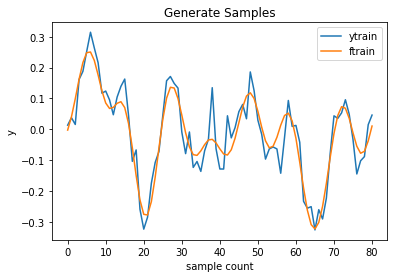

In [7]:
fig = plt.figure()
ax = fig.gca()
plt.title("Generate Samples")
plt.xlabel("sample count")
plt.ylabel("y")

ax.plot(data_x, ytrain, label='ytrain')
ax.plot(data_x, ftrain, label='ftrain')

ax.legend()
fig.show()

In [8]:
G_matrix = np.dot( Xtrain, Xtrain.transpose())

In [10]:
G_matrix.shape

(81, 81)

In [11]:
G_trace = G_matrix.trace()
G_trace

28.551556565584644

In [12]:
num_train = 65
num_val = 16

def get_predict(**args):
    if 'alpha' in args:
        alpha = args['alpha']
        clf = Ridge(alpha=alpha)
    elif 'C' in args and not 'nu' in args:
        clf = SVR(kernel='linear', C=args['C'])
    elif 'C' in args and 'nu' in args:
        clf = NuSVR(kernel='linear', C=args['C'], nu=args['nu'])
    clf.fit(Xtrain[0:num_train, :], ytrain[0:num_train])
    
    y_val_pred = clf.predict(Xtrain[num_train:, :])
    mse_val = mean_squared_error(y_val_pred, ytrain[num_train:])
    y_test_pred = clf.predict(Xtest)
    mse_test = mean_squared_error(y_test_pred, ytest)
    
    return y_val_pred, mse_val, y_test_pred, mse_test


get_predict_vect = np.vectorize(get_predict, otypes=[np.ndarray, np.float64, np.ndarray, np.float64])

alpha = np.logspace(-2, 1, 100)*G_trace
alpha.shape
y_val_pred, mse_val, y_test_pred, mse_test = get_predict_vect(alpha=alpha)

print(y_val_pred.shape, mse_val.size, y_test_pred.shape, mse_test.shape)
print(y_test_pred[3])
print(f'alpha: {alpha}')

(100,) 100 (100,) (100,)
[-0.04439242  0.01448567  0.04937866  0.03543228  0.01663006  0.00240558
 -0.0252926  -0.05917047 -0.03403504 -0.00808742  0.02516558  0.04779887
  0.02578045  0.00348644 -0.00187737  0.04618204 -0.00772988  0.00142494
  0.02640211  0.04064515  0.09421268  0.07259322  0.11097199  0.06222359
  0.08057722  0.0862301   0.09897755  0.05954103  0.03477086  0.04480306
  0.01948792 -0.00799598 -0.08421613 -0.05112317 -0.11698337 -0.11965151
 -0.11935887 -0.01506928  0.06014209  0.0935197   0.20465792  0.19790816
  0.19646578  0.11073799 -0.00047698 -0.06561243 -0.10238907 -0.08507214
 -0.07365557 -0.1085708  -0.08692509 -0.01276285 -0.05753387 -0.11688546
 -0.15640043 -0.19032336 -0.10991197 -0.07831136 -0.07612443 -0.06970694
 -0.01607484 -0.00364294 -0.01066729 -0.0293992  -0.08491006 -0.03780558
 -0.04671229 -0.0667204  -0.02165606  0.05546325  0.1840565   0.22171269
  0.24540663  0.16134147  0.09213424  0.0438602  -0.10239747 -0.11252002
 -0.01185298  0.0195925   

In [13]:
val_optimum_ind = np.where(mse_val == mse_val.min())
val_optimum_ind

y_test_pred[val_optimum_ind][0]

array([-0.04855372,  0.01594995,  0.05348597,  0.03577189,  0.01641878,
        0.00230084, -0.02767362, -0.06348856, -0.03394955, -0.00739753,
        0.02818991,  0.05195711,  0.02588301, -0.00035209, -0.0038383 ,
        0.04981437, -0.00821873,  0.00247257,  0.02824935,  0.04112935,
        0.09810884,  0.07431464,  0.11479018,  0.06308534,  0.08460745,
        0.08906666,  0.10159761,  0.06051034,  0.03596188,  0.04759821,
        0.01987415, -0.00874694, -0.09046042, -0.0511271 , -0.1205179 ,
       -0.12197522, -0.1225629 , -0.01250962,  0.06462668,  0.09801432,
        0.21624451,  0.20410416,  0.20067217,  0.11002771, -0.00399756,
       -0.06997409, -0.10624767, -0.08669154, -0.07455558, -0.11375154,
       -0.09097724, -0.01046762, -0.05940025, -0.12239944, -0.16334417,
       -0.19676758, -0.10816181, -0.07820663, -0.08054876, -0.07411071,
       -0.01647446, -0.00474959, -0.01276953, -0.03337332, -0.09270393,
       -0.03778497, -0.04702881, -0.0705555 , -0.02385508,  0.05

In [14]:
min_mse_val = mse_val.min()
print(f'Minimum MSE for validation: {min_mse_val}')

# prints optimum alpha value
opt_alpha = alpha[val_optimum_ind][0]
print(f'Optimum alpha value for minimum MSE: {opt_alpha}')

# prints minimum MSE for test
print(f'Minimum MSE for test: {mse_test.min()}')

# prints 
#prints mse for test based on validation mse
print(f'MSE for test based on optimum validation index: {mse_test[val_optimum_ind][0]}')

Minimum MSE for validation: 0.004816247705237898
Optimum alpha value for minimum MSE: 0.28551556565584646
Minimum MSE for test: 0.0058038445974970924
MSE for test based on optimum validation index: 0.0058038445974970924


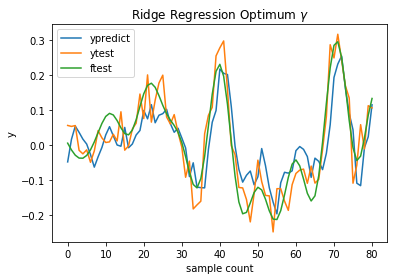

In [15]:
fig = plt.figure()
ax = fig.gca()
ax.plot(data_x, y_test_pred[val_optimum_ind][0], label='ypredict')
ax.plot(data_x, ytest, label='ytest')
ax.plot(data_x, ftest, label='ftest')
plt.title(f"Ridge Regression Optimum $\gamma$")
plt.xlabel('sample count')
plt.ylabel('y')
ax.legend()
plt.show()

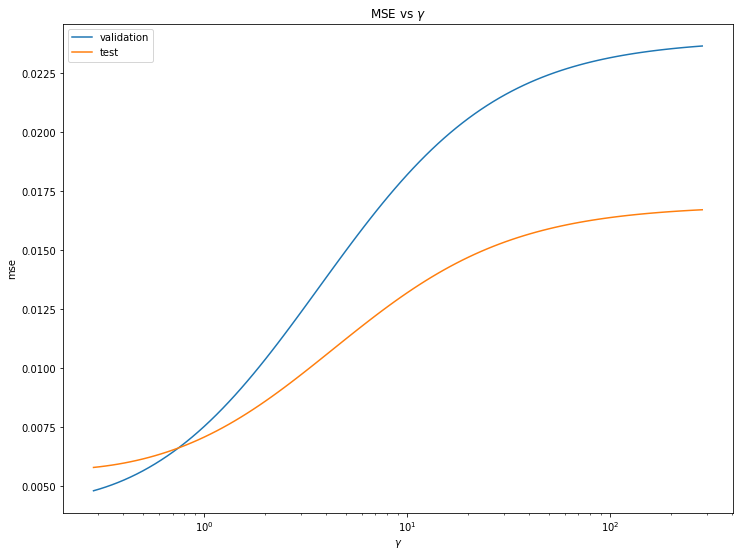

In [13]:
plt.figure(figsize=(12,9))
plt.title('MSE vs $\gamma$')
plt.xlabel('$\gamma$')
plt.ylabel('mse')
plt.plot(alpha, mse_val, label='validation')
plt.plot(alpha, mse_test, label='test')
plt.legend()
plt.xscale('log')

In [14]:
C = np.logspace(-1.5, 1, 100)
y_val_pred, mse_val, y_test_pred, mse_test = get_predict_vect(C=C)

In [15]:
val_optimum_ind = np.where(mse_val == mse_val.min())
val_optimum_ind

(array([81], dtype=int64),)

In [16]:
min_mse_val = mse_val.min()
print(f'Minimum MSE for validation: {min_mse_val}')

# prints optimum alpha value
opt_alpha = C[val_optimum_ind][0]
print(f'Optimum alpha value for minimum MSE: {opt_alpha}')

# prints minimum MSE for test
print(f'Minimum MSE for test: {mse_test.min()}')

# prints 
#prints mse for test based on validation mse
print(f'MSE for test based on optimum validation index: {mse_test[val_optimum_ind][0]}')

Minimum MSE for validation: 0.004681096026323169
Optimum alpha value for minimum MSE: 3.511191734215131
Minimum MSE for test: 0.006032149116147227
MSE for test based on optimum validation index: 0.0067437502826148245


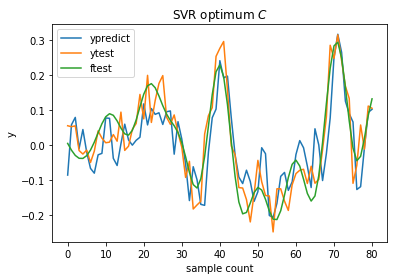

In [17]:
fig = plt.figure()
ax = fig.gca()
plt.title("SVR optimum $C$")
plt.xlabel('sample count')
plt.ylabel('y')
ax.plot(data_x, y_test_pred[val_optimum_ind][0], label='ypredict')
ax.plot(data_x, ytest, label='ytest')
ax.plot(data_x, ftest, label='ftest')
ax.legend()
plt.show()

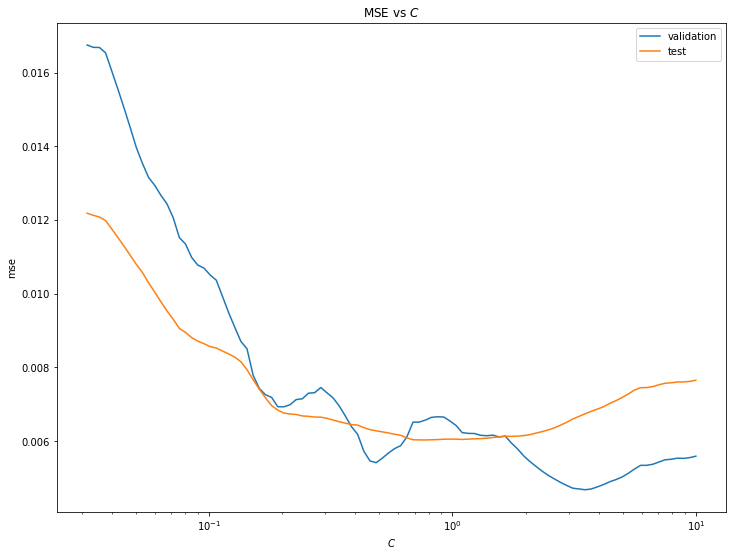

In [18]:
plt.figure(figsize=(12,9))
plt.title('MSE vs $C$')
plt.xlabel('$C$')
plt.ylabel('mse')
plt.plot(C, mse_val, label='validation')
plt.plot(C, mse_test, label='test')
plt.legend()
plt.xscale('log')

In [19]:
C = np.logspace(-1.5, 1, 100)
nu = np.ones(100) * .5
y_val_pred, mse_val, y_test_pred, mse_test = get_predict_vect(C=C, nu=nu)

In [20]:
val_optimum_ind = np.where(mse_val == mse_val.min())
val_optimum_ind

(array([51], dtype=int64),)

In [21]:
min_mse_val = mse_val.min()
print(f'Minimum MSE for validation: {min_mse_val}')

# prints optimum alpha value
opt_alpha = C[val_optimum_ind][0]
print(f'Optimum C value for minimum MSE: {opt_alpha}')

# prints minimum MSE for test
print(f'Minimum MSE for test: {mse_test.min()}')

# prints 
#prints mse for test based on validation mse
print(f'MSE for test based on optimum validation index: {mse_test[val_optimum_ind][0]}')

Minimum MSE for validation: 0.004482167177020269
Optimum C value for minimum MSE: 0.6135907273413173
Minimum MSE for test: 0.0060763677887079245
MSE for test based on optimum validation index: 0.0060763677887079245


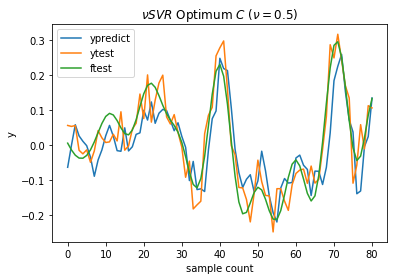

In [22]:
fig = plt.figure()
ax = fig.gca()
plt.title("$\\nu SVR$ Optimum $C$ ($\\nu=0.5$)")
plt.xlabel('sample count')
plt.ylabel('y')
ax.plot(data_x, y_test_pred[val_optimum_ind][0], label='ypredict')
ax.plot(data_x, ytest, label='ytest')
ax.plot(data_x, ftest, label='ftest')
ax.legend()
plt.show()

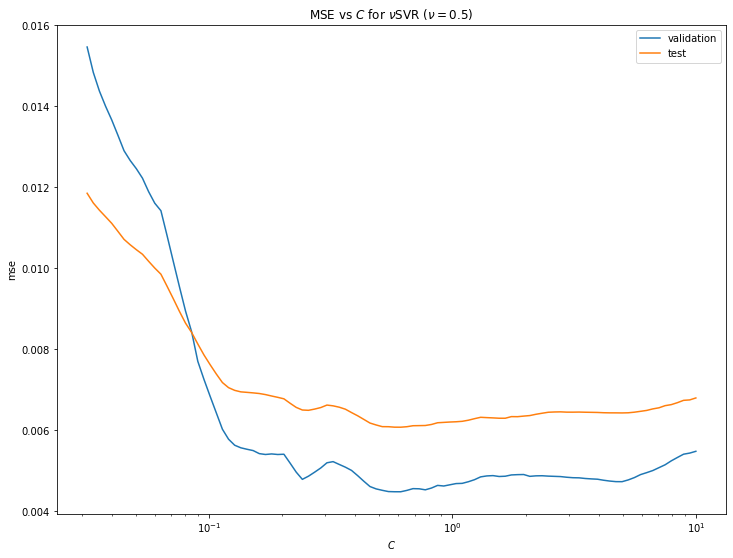

In [23]:
plt.figure(figsize=(12,9))
plt.title('MSE vs $C$ for $\\nu$SVR ($\\nu=0.5$)')
plt.xlabel('$C$')
plt.ylabel('mse')
plt.plot(C, mse_val, label='validation')
plt.plot(C, mse_test, label='test')
plt.legend()
plt.xscale('log')

In [24]:
C = np.ones(100)
nu = np.logspace(-2, 0, 100)
y_val_pred, mse_val, y_test_pred, mse_test = get_predict_vect(C=C, nu=nu)

In [25]:
val_optimum_ind = np.where(mse_val == mse_val.min())
val_optimum_ind

(array([73], dtype=int64),)

In [26]:
min_mse_val = mse_val.min()
print(f'Minimum MSE for validation: {min_mse_val}')

# prints optimum alpha value
opt_alpha = nu[val_optimum_ind][0]
print(f'Optimum $\\nu$ value for minimum MSE: {opt_alpha}')

# prints minimum MSE for test
print(f'Minimum MSE for test: {mse_test.min()}')

# prints 
#prints mse for test based on validation mse
print(f'MSE for test based on optimum validation index: {mse_test[val_optimum_ind][0]}')

Minimum MSE for validation: 0.004075973072591512
Optimum $\nu$ value for minimum MSE: 0.298364724028334
Minimum MSE for test: 0.005662876732726572
MSE for test based on optimum validation index: 0.005713371687959595


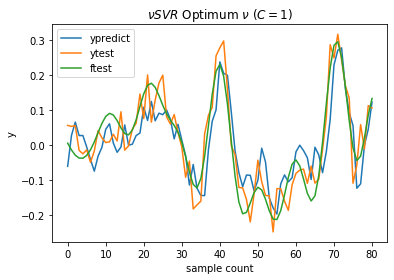

In [27]:
fig = plt.figure()
ax = fig.gca()
plt.title("$\\nu SVR$ Optimum $\\nu$ ($C=1$)")
plt.xlabel('sample count')
plt.ylabel('y')
ax.plot(data_x, y_test_pred[val_optimum_ind][0], label='ypredict')
ax.plot(data_x, ytest, label='ytest')
ax.plot(data_x, ftest, label='ftest')
ax.legend()
plt.show()

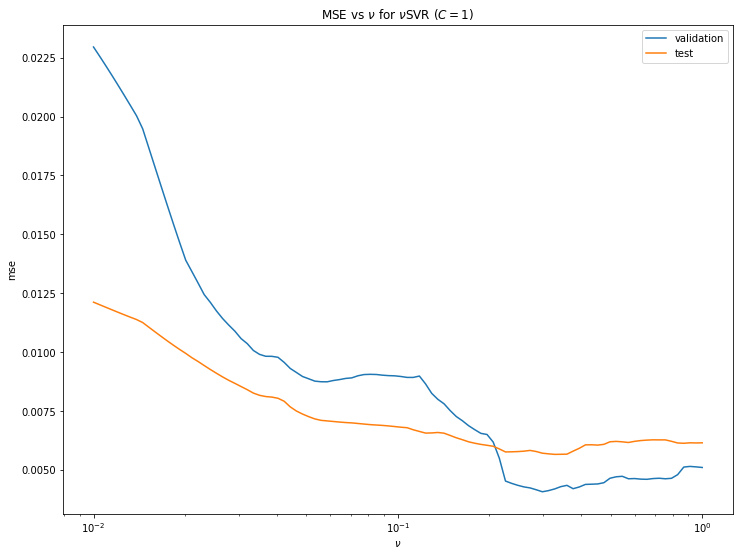

In [28]:
plt.figure(figsize=(12,9))
plt.title('MSE vs $\\nu$ for $\\nu$SVR ($C=1$)')
plt.xlabel('$\\nu$')
plt.ylabel('mse')
plt.plot(nu, mse_val, label='validation')
plt.plot(nu, mse_test, label='test')
plt.legend()
plt.xscale('log')

In [114]:
C = np.logspace(-1.5, 1, 100)
nu = np.logspace(-2, 0, 100)
# nu_svr = [get_predict_vect(C=C, nu=val) for val in nu]


In [115]:
mse_array = np.ndarray((len(C), len(nu)))
for i, c in enumerate(C):
    for j, n in enumerate(nu):
        clf = NuSVR(kernel='linear', C=c, nu=n)
        clf.fit(Xtrain[0:num_train, :], ytrain[0:num_train])
        y_val_pred = clf.predict(Xtrain[num_train:, :])
        mse_array[i,j] = mean_squared_error(y_val_pred, ytrain[num_train:])
        y_test_pred = clf.predict(Xtest)
        mse_test = mean_squared_error(y_test_pred, ytest)

In [116]:
mse_array.shape

(100, 100)

In [117]:
mse_array_lin = mse_array.ravel()
min_mse = mse_array_lin.min()
max_mse = mse_array_lin.max()
print(min_mse)
print(max_mse)

0.0039313052796259825
0.026723152224777322


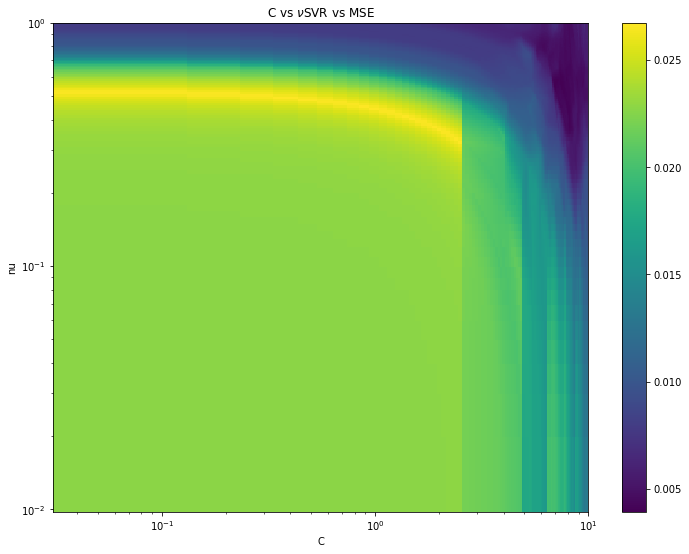

In [118]:
def extents(f):
  delta = f[1] - f[0]
  return [f[0] - delta/2, f[-1] + delta/2]

colors = np.linspace(min_mse, max_mse, len(C))

plt.figure(figsize=(12,9))
plt.imshow(mse_array, aspect='auto', interpolation='none', extent=extents(C) + extents(nu), origin='lower')
plt.title('C vs $\\nu$SVR vs MSE')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('C')
plt.ylabel('nu')
plt.colorbar()
plt.show()

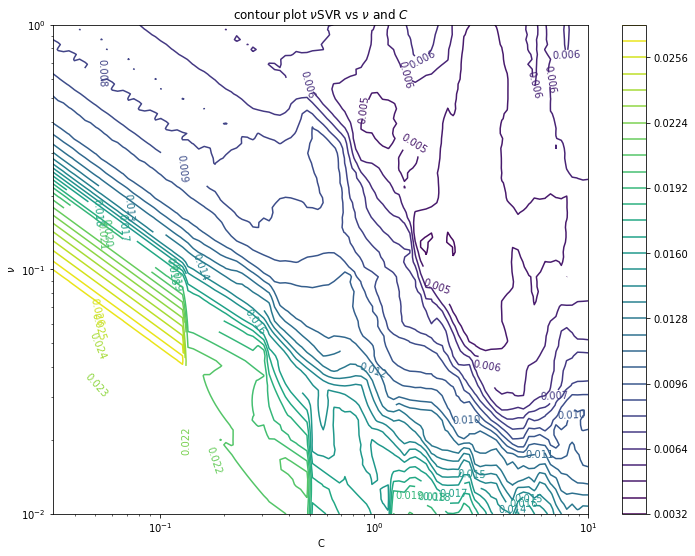

In [129]:
fig = plt.figure()
ax = fig.gca()
CS = ax.contour(C, nu, mse_array, 35)
ax.clabel(CS, inline=1, fontsize=10)
plt.yscale('log')
plt.xscale('log')
CB = fig.colorbar(CS)
# plt.imshow(mse_array, aspect='auto', interpolation='none', extent=extents(C) + extents(nu), origin='lower', alpha=.5)
# plt.colorbar()

plt.xlabel('C')
plt.ylabel('$\\nu$')
plt.title('contour plot $\\nu$SVR vs $\\nu$ and $C$')
plt.show()

In [120]:
min_mse = np.where(mse_array == np.amin(mse_array))
min_mse

(array([54], dtype=int64), array([69], dtype=int64))

In [121]:
min_c = C[min_mse[0]]
min_nu = nu[min_mse[1]]
min_mse_val = mse_val.min()

clf = NuSVR(kernel='linear', C=min_c, nu=min_nu)
clf.fit(Xtrain[0:num_train, :], ytrain[0:num_train])
y_val_pred = clf.predict(Xtrain[num_train:, :])
mse_train = mean_squared_error(y_val_pred, ytrain[num_train:])
y_test_pred = clf.predict(Xtest)
mse_test = mean_squared_error(y_test_pred, ytest)
print(mse_train)
print(mse_test)

0.0039313052796259825
0.005743857975097318


In [122]:
mse_array[min_mse]

array([0.00393131])

In [125]:
min_c = C[min_mse[0]][0]
min_nu = nu[min_mse[1]][0]
min_mse_val = mse_val.min()
print(f'Minimum MSE for validation: {mse_train}')
print(f'Optimum $C$ value for minimum MSE: {min_c}')
print(f'Optimum $\\nu$ value for minimum MSE: {min_nu}')
print(f'Optimum MSE for test: {mse_test}')



Minimum MSE for validation: 0.0039313052796259825
Optimum $C$ value for minimum MSE: 0.7305271542664452
Optimum $\nu$ value for minimum MSE: 0.24770763559917114
Optimum MSE for test: 0.005743857975097318


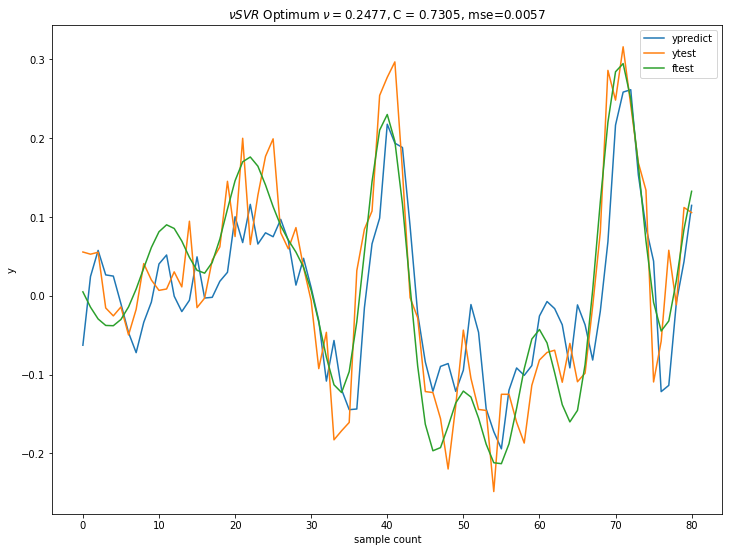

In [124]:
fig = plt.figure()
ax = fig.gca()
plt.title(f"$\\nu SVR$ Optimum $\\nu = {min_nu:.4}, $C = {min_c:.4f}, mse={mse_test:.4f}")
plt.xlabel('sample count')
plt.ylabel('y')
ax.plot(data_x, y_test_pred, label='ypredict')
ax.plot(data_x, ytest, label='ytest')
ax.plot(data_x, ftest, label='ftest')
ax.legend()
plt.show()